<a href="https://colab.research.google.com/github/Almonfrey/MAI-Course/blob/main/class_5_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [ ]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from imblearn.over_sampling import RandomOverSampler

Downloading data

In [ ]:
# Download data
url = "https://raw.githubusercontent.com/Almonfrey/MAI-Course/main/data/german_credit_risk.csv"
df = pd.read_csv(url)

print(df[0:3])

   Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  \
0           0   67    male    2     own             NaN           little   
1           1   22  female    2     own          little         moderate   
2           2   49    male    1     own          little              NaN   

   Credit amount  Duration    Purpose  Risk  
0           1169         6   radio/TV  good  
1           5951        48   radio/TV   bad  
2           2096        12  education  good  


Data preparation

In [ ]:
# Organize data in variables
# Name of features used
feature_names = ['Age', 'Job', 'Credit amount', 'Duration']
X = df[feature_names]

# Proceed with label encoding, since "Risk" is categorical: "good" or "bad"
y = df['Risk'].map({'good': 1, 'bad': 0})

# Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Data preprocessing

In [ ]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Training process


In [ ]:
# Train logistic regression
model = LogisticRegression(class_weight='balanced')
model.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced')

Evaluation *process*


Classification Report:
                 precision    recall  f1-score   support

 Bad Credit (0)       0.33      0.42      0.37        59
Good Credit (1)       0.73      0.65      0.68       141

       accuracy                           0.58       200
      macro avg       0.53      0.53      0.53       200
   weighted avg       0.61      0.58      0.59       200



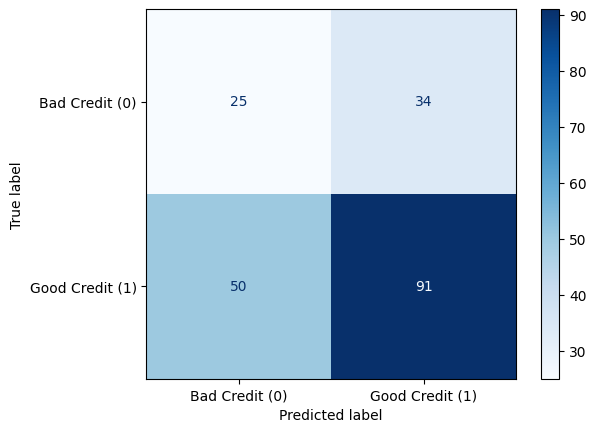

In [ ]:
# Predict & evaluate
y_pred = model.predict(X_test_scaled)

# Plot confusion matrix
labels = ['Bad Credit (0)', 'Good Credit (1)']
ConfusionMatrixDisplay.from_predictions(y_test, y_pred,
                                        display_labels=labels,
                                        cmap='Blues')

# Print classification report
print("\nClassification Report:")

print(classification_report(y_test, y_pred, target_names=labels))

In [ ]:
# Get boolean mask where predictions are Good Credit (1)
good_credit_mask = y_pred == 1

# Apply the mask to X_test to get the corresponding feature values
X_test_predicted_good = X_test[good_credit_mask]

# Optionally, reset the index and show the results
print("Features of test samples predicted as Good Credit (1):")
print(X_test_predicted_good.reset_index(drop=True))

Features of test samples predicted as Good Credit (1):
     Age  Job  Credit amount  Duration
0     35    1           4380        18
1     23    2           1297        12
2     64    1           2384        24
3     41    2           2116         6
4     26    2           3577         9
..   ...  ...            ...       ...
120   33    2           3029        15
121   43    1           1533        18
122   41    1            888        12
123   40    3           4297        18
124   66    3           1908        30

[125 rows x 4 columns]


Prediction for one sample

In [ ]:
# Create a DataFrame for the new sample
new_sample_df = pd.DataFrame([[40, 1, 5000, 24]], columns=feature_names)

# Scale the sample
new_sample_scaled = scaler.transform(new_sample_df)

# Predict class
prediction = model.predict(new_sample_scaled)

# Show result
print("Prediction:", "Good Credit (1)" if prediction[0] == 1 else "Bad Credit (0)")


Prediction: Bad Credit (0)
